In [1]:
!mkdir /content/btp


In [2]:
cd /content/btp

/content/btp


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import zipfile

In [6]:
dataset_path="/content/drive/MyDrive/BTP/archive (2).zip"
zfile = zipfile.ZipFile(dataset_path)

In [7]:
zfile.extractall(path = "/content/btp")

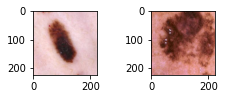

In [ ]:
# plot Melanoma images
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = '/content/btp/DermMel/train_sep/Melanoma/'
# plot first few images
for i in range(2):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'AUG_0_' + str(i) + '.jpeg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

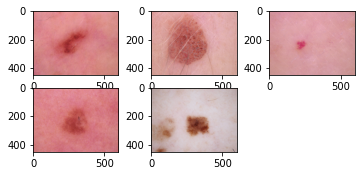

In [ ]:
#Plot non Melanoma Images
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = '/content/btp/DermMel/train_sep/NotMelanoma/'
# plot first few images
for i in range(3,8):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + "ISIC_002437" + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()


In [13]:
import sys
import os
from os.path import join

In [14]:
path= "/content/btp/DermMel/"
print(os.listdir(path))

['train_sep', 'test', 'valid']


In [15]:
train_path = path + 'train_sep/'
print(len(os.listdir(train_path)), " TRAIN Directories of photos")
Labels = os.listdir(train_path)
sig = 0
for label in sorted(Labels):
    print(label,len(os.listdir(train_path + label +'/')))
    sig = sig + len(os.listdir(train_path+ label +'/'))


print("Total TRAIN photos ", sig)
print("_"*50)

val_path = path + 'valid/'
print(len(os.listdir(val_path)), " VALID Directories of photos")
Labels = os.listdir(val_path)
sig = 0
for label in sorted(Labels):
    print(label,len(os.listdir(val_path + label +'/')))
    sig = sig + len(os.listdir(val_path + label +'/'))

print("Total Validation photos ", sig)
print("_"*50)

test_path = path + 'test/'
print(len(os.listdir(test_path)), " TEST Directories of photos")
Labels = os.listdir(test_path)
sig = 0
for label in sorted(Labels):
    print(label,len(os.listdir(test_path + label +'/')))
    sig = sig + len(os.listdir(test_path + label +'/'))

print("Total Testing photos ", sig)
print("_"*50)

2  TRAIN Directories of photos
Melanoma 5341
NotMelanoma 5341
Total TRAIN photos  10682
__________________________________________________
2  VALID Directories of photos
Melanoma 1781
NotMelanoma 1781
Total Validation photos  3562
__________________________________________________
2  TEST Directories of photos
Melanoma 1781
NotMelanoma 1780
Total Testing photos  3561
__________________________________________________


In [16]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = train_path
validation_dir = val_path
test_dir = test_path
target_size=(224, 224)
batch_size=10
#train_datagen = ImageDataGenerator(rescale=1./255)
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=45,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,target_size=target_size,batch_size=batch_size,shuffle=True,seed=42)
validation_generator = test_datagen.flow_from_directory(
    validation_dir,target_size=target_size,batch_size=batch_size,shuffle=True,seed=42)
test_generator = test_datagen.flow_from_directory(
    test_dir,target_size=target_size,batch_size=1)

Found 10682 images belonging to 2 classes.
Found 3562 images belonging to 2 classes.
Found 3561 images belonging to 2 classes.


In [ ]:
print(train_generator.class_indices)
print(validation_generator.class_indices)
print(test_generator.class_indices)

{'Melanoma': 0, 'NotMelanoma': 1}
{'Melanoma': 0, 'NotMelanoma': 1}
{'Melanoma': 0, 'NotMelanoma': 1}


In [ ]:
from tensorflow import keras 
model = keras.Sequential([
  keras.layers.InputLayer(input_shape =(224,224,3)),
  keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu',padding ="same", kernel_initializer = "he_uniform"),
  keras.layers.MaxPooling2D(pool_size = (2,2)),
  keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu',padding ="same", kernel_initializer = "he_uniform"),
  keras.layers.MaxPooling2D(pool_size=(2, 2)),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'),
  keras.layers.Dense(2, activation='sigmoid')

])

In [ ]:
LR = 0.001
batch_size = 10
OPT=keras.optimizers.Adam(learning_rate=LR)
model.compile(loss='categorical_crossentropy', optimizer=OPT, metrics=['accuracy', 'AUC'])

In [ ]:
history = model.fit(train_generator, epochs=20, 
                    steps_per_epoch=train_generator.n//train_generator.batch_size,
                    validation_data=validation_generator, 
                    validation_steps=validation_generator.n//validation_generator.batch_size)

Epoch 1/20
1068/1068 [==============================] - 224s 179ms/step - loss: 1.7537 - accuracy: 0.6276 - auc: 0.6687 - val_loss: 0.6405 - val_accuracy: 0.6904 - val_auc: 0.7318
Epoch 2/20
1068/1068 [==============================] - 170s 159ms/step - loss: 0.5997 - accuracy: 0.6702 - auc: 0.7344 - val_loss: 0.5266 - val_accuracy: 0.7174 - val_auc: 0.8128
Epoch 3/20
1068/1068 [==============================] - 170s 159ms/step - loss: 0.5596 - accuracy: 0.6960 - auc: 0.7743 - val_loss: 0.5203 - val_accuracy: 0.7565 - val_auc: 0.8333
Epoch 4/20
1068/1068 [==============================] - 170s 159ms/step - loss: 0.5397 - accuracy: 0.7188 - auc: 0.7985 - val_loss: 0.4999 - val_accuracy: 0.7719 - val_auc: 0.8511
Epoch 5/20
1068/1068 [==============================] - 171s 160ms/step - loss: 0.5182 - accuracy: 0.7360 - auc: 0.8130 - val_loss: 0.5024 - val_accuracy: 0.7576 - val_auc: 0.8319
Epoch 6/20
1068/1068 [==============================] - 172s 161ms/step - loss: 0.5024 - accuracy: 0

In [ ]:
model.save("VGG_Final.h5")

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               12845184  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 2

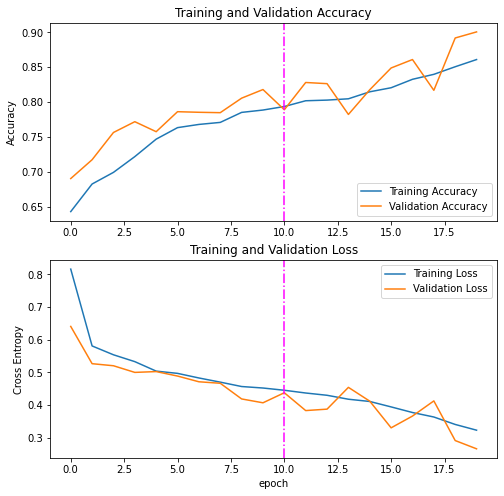

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.axvline(10, ls='-.', color='magenta')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.axvline(10, ls='-.', color='magenta')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
import numpy as np
y=np.concatenate([test_generator.next()[1] for i in range(test_generator.__len__())])
true_labels=np.argmax(y, axis=-1)
prediction= model.predict(test_generator, verbose=2)
prediction=np.argmax(prediction, axis=-1)

3561/3561 - 21s


In [31]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true=true_labels, y_pred=prediction)

Confusion matrix, without normalization
[[1540  241]
 [ 154 1626]]
Accuracy: 0.889
Precision: 0.871
Recall: 0.913
F-Measure: 0.892
Sensitivity: 0.865
Specificity: 0.913


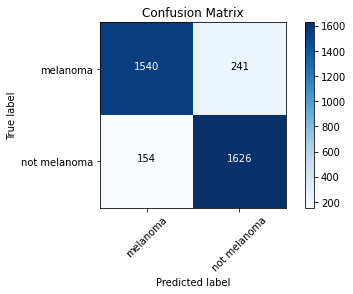

In [ ]:
cm_plot_labels = ['melanoma','not melanoma']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
from sklearn.metrics import accuracy_score
acc=accuracy_score(true_labels,prediction) 
print('Accuracy: %.3f' % acc)
from sklearn.metrics import precision_score
precision = precision_score(true_labels,prediction,labels=[1,2], average='micro')
print('Precision: %.3f' % precision)
from sklearn.metrics import recall_score
recall = recall_score(true_labels,prediction, average='binary')
print('Recall: %.3f' % recall)
from sklearn.metrics import f1_score
score = f1_score(true_labels,prediction, average='binary')
print('F-Measure: %.3f' % score)
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Sensitivity: %.3f" % sensitivity)
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print("Specificity: %.3f" % specificity)

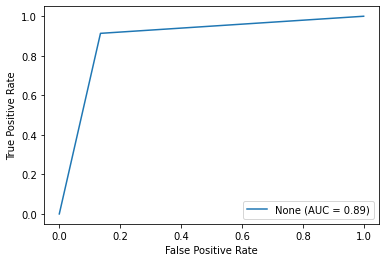

In [ ]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(true_labels,prediction)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name= None) 
display.plot()
plt.show()

# **Quantization**

In [ ]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmp0qdcv1db/assets


In [9]:
import pathlib
tflite_models_dir = pathlib.Path("/content/btp")
tflite_models_dir.mkdir(exist_ok=True, parents=True)


In [ ]:
tflite_model_file = tflite_models_dir/"VGG_Final_Model.tflite"
tflite_model_file.write_bytes(tflite_model)


51425424

In [ ]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()
tflite_model_quant_file = tflite_models_dir/"VGG_Final_model_quant.tflite"
tflite_model_quant_file.write_bytes(tflite_quant_model)

INFO:tensorflow:Assets written to: /tmp/tmp11zeb10a/assets


INFO:tensorflow:Assets written to: /tmp/tmp11zeb10a/assets


12863568

In [8]:
# Float 16 quantization
from tensorflow import keras
import tensorflow as tf
keras_model = keras.models.load_model('/content/drive/MyDrive/BTP/VGG_Final.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(keras_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]
tflite_quant_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpwqbsxhgb/assets


In [10]:
# Save the model.
with open('/content/btp/VGG2_Quant_Model_Final.tflite', 'wb') as f:
  f.write(tflite_quant_model)


In [20]:
interpreter_float16 = tf.lite.Interpreter(model_path=str("/content/btp/VGG2_Quant_Model_Final.tflite"))
interpreter_float16.allocate_tensors()

In [25]:
import os
file_name = []
for f in test_generator.filenames:
  fi = os.path.join("/content/btp/DermMel/test", f)
  file_name.append(fi)

In [18]:
labels = test_generator.labels


In [22]:
interpreter = interpreter_float16

In [27]:
#making predictions the TF Lite model using "test" dataset.
from tqdm import tqdm
import numpy as np
from tensorflow.keras.preprocessing import image

input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

# Run predictions on every image in the "test" dataset.
prediction_digits = []
for f in tqdm(file_name):
  img = image.load_img(f, target_size=(224, 224))
  img_array = image.img_to_array(img)
  img_batch = np.expand_dims(img_array, axis=0) 
  img_batch = img_batch/255.0
  interpreter.set_tensor(input_index, img_batch)

  # Run inference.
  interpreter.invoke()

  # Post-processing: remove batch dimension and find the digit with highest
  # probability.
  output = interpreter.tensor(output_index)
  digit = np.argmax(output()[0])
  prediction_digits.append(digit)



100%|██████████| 3561/3561 [01:49<00:00, 32.48it/s]


In [28]:
print(prediction_digits)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [32]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
cm_quant = confusion_matrix(y_true=labels, y_pred=prediction_digits)

Confusion matrix, without normalization
[[1540  241]
 [ 156 1624]]
Accuracy: 0.889
Precision: 0.871
Recall: 0.912
F-Measure: 0.891
Sensitivity: 0.865
Specificity: 0.912


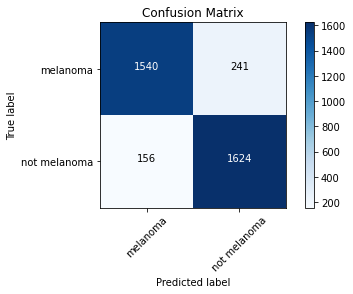

In [34]:
cm_plot_labels = ['melanoma','not melanoma']
plot_confusion_matrix(cm=cm_quant, classes=cm_plot_labels, title='Confusion Matrix')
from sklearn.metrics import accuracy_score
acc=accuracy_score(labels,prediction_digits) 
print('Accuracy: %.3f' % acc)
from sklearn.metrics import precision_score
precision = precision_score(labels,prediction_digits,labels=[1,2], average='micro')
print('Precision: %.3f' % precision)
from sklearn.metrics import recall_score
recall = recall_score(labels,prediction_digits, average='binary')
print('Recall: %.3f' % recall)
from sklearn.metrics import f1_score
score = f1_score(labels,prediction_digits, average='binary')
print('F-Measure: %.3f' % score)
sensitivity = cm_quant[0,0]/(cm_quant[0,0]+cm_quant[0,1])
print("Sensitivity: %.3f" % sensitivity)
specificity = cm_quant[1,1]/(cm_quant[1,0]+cm_quant[1,1])
print("Specificity: %.3f" % specificity)

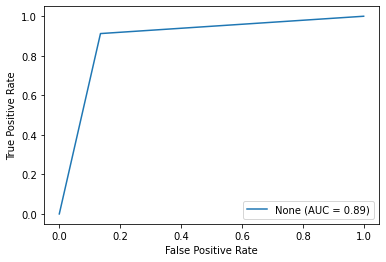

In [39]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(labels,prediction_digits)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name= None) 
display.plot()
plt.show()